# 💻 Question No: 02

## ⚙️ Setup

- Ensure the Python kernel has the necessary libraries: `pandas`, `seaborn`,`numpy`,`kmeans`,`matplotlib` and `lets-plot`
- Ensure the `Marketing-Customer-Value-Analysis..csv` file is in the `data` folder.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
df = pd.read_csv("D:/Data Science for Marketing-I/dataset/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Data Science for Marketing-I/dataset/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv'

### i. Create a new column named "Engaged" by transforming the categorical values in the "Response" variable into numerical values. Why is this transformation important?

In [ ]:
df['Engaged'] = df['Response'].apply(lambda x: 1 if x == 'Yes' else 0)

💡 Convert the categorical "Response" column (values: "Yes" and "No") into numerical values (1 for "Yes" and 0 for "No"),This transformation is important because machine learning models work better with numerical data.

### ii. Explain the process of creating dummy variables from the categorical features ['Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type', 'Employment Status', 'Marital Status', 'Education', 'Coverage'] in the dataset. What function is used, and what is its significance in preparing the data for modeling?

In [ ]:
continuous_features = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount'
]

In [ ]:
columns_to_encode = [
    'Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type',
    'EmploymentStatus', 'Marital Status', 'Education', 'Coverage'
]

In [ ]:
categorical_features = []
for col in columns_to_encode:
    encoded_df = pd.get_dummies(df[col])
    encoded_df.columns = [col.replace(' ', '.') + '.' + x for x in encoded_df.columns]
    categorical_features += list(encoded_df.columns)

    df = pd.concat([df, encoded_df], axis=1)
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Marital.Status.Married,Marital.Status.Single,Education.Bachelor,Education.College,Education.Doctor,Education.High School or Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,True,False,True,False,False,False,False,True,False,False
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,False,True,True,False,False,False,False,False,True,False
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,True,False,True,False,False,False,False,False,False,True
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,True,False,True,False,False,False,False,True,False,False
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,False,True,True,False,False,False,False,True,False,False


💡Categorical data like Sales Channel and Policy Type are converted into numbers using One-Hot Encoding. This allows machine learning models to use them effectively without misinterpreting them as ordered values.

### iii. Combine all features into a single dataset for model building.

In [ ]:
all_features =continuous_features+ categorical_features
response = 'Engaged'

In [ ]:
sample_df = df[all_features + [response]]
sample_df.columns = [x.replace(' ', '.') for x in sample_df.columns]
all_features = [x.replace(' ', '.') for x in all_features]

In [ ]:
sample_df.head()

,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Sales.Channel.Agent,Sales.Channel.Branch,...,Marital.Status.Single,Education.Bachelor,Education.College,Education.Doctor,Education.High.School.or.Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium,Engaged
0,2763.519279,56274,69,32,5,0,1,384.811147,True,False,...,False,True,False,False,False,False,True,False,False,0
1,6979.535903,0,94,13,42,0,8,1131.464935,True,False,...,True,True,False,False,False,False,False,True,False,0
2,12887.431650,48767,108,18,38,0,2,566.472247,True,False,...,False,True,False,False,False,False,False,False,True,0
3,7645.861827,0,106,18,65,0,7,529.881344,False,False,...,False,True,False,False,False,False,True,False,False,0
4,2813.692575,43836,73,12,44,0,1,138.130879,True,False,...,True,True,False,False,False,False,True,False,False,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(sample_df[all_features], sample_df[response], test_size=0.3, random_state=42)

In [ ]:
sample_df.shape

(9134, 50)

In [ ]:
X_train.shape

(6393, 49)

In [ ]:
X_test.shape

(2741, 49)

💡merge numerical and encoded categorical features into a single dataset. This ensures the model has all relevant information needed for predicting engagement.

### iv. Split the dataset into a 70:30 ratio for training and test data, and build a Random Forest model using the training data.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,#tree depth(number of estimators)
    max_depth=5
)

In [ ]:
rf_model.fit(X=X_train, y=y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [ ]:
#rf_model.estimators_ 

[DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=984433862),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=783864155),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=619485050),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=859309689),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=664595621),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=588297939),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=396931278),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=892243293),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1562441063),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=68098665),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1154618388),
 DecisionTreeClassifier(max_depth=5, m

In [ ]:
rf_model.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=984433862)

In [ ]:
rf_model.predict(X_test)[:23]#

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

💡The dataset is split into 70% training and 30% testing, and a Random Forest model with 200 trees is trained. This helps in understanding customer engagement patterns while preventing overfitting.

### v. After fitting the Random Forest model, how can you interpret the output of rf_model.feature_importances_? What does this tell you about the features in the dataset?

In [ ]:
rf_model.feature_importances_

array([0.06300088, 0.07759684, 0.05047781, 0.03457928, 0.05072936,
       0.01523457, 0.01897311, 0.07066971, 0.04218187, 0.00772042,
       0.0120923 , 0.0061495 , 0.00793029, 0.00484044, 0.01163603,
       0.00536518, 0.00074485, 0.00209348, 0.0045593 , 0.00355282,
       0.00435042, 0.00083564, 0.00126896, 0.00155198, 0.00220775,
       0.00159134, 0.00146389, 0.00065215, 0.00073306, 0.00203814,
       0.00119688, 0.00060135, 0.00078711, 0.00850507, 0.02373257,
       0.00264063, 0.30234282, 0.02413936, 0.05022302, 0.02086839,
       0.01755426, 0.00419729, 0.00507644, 0.00559613, 0.00382318,
       0.0087765 , 0.00536635, 0.00511294, 0.00263832])

In [ ]:
feature_importance_df = pd.DataFrame(list(zip(rf_model.feature_importances_, all_features)))
feature_importance_df.columns = ['feature.importance', 'feature']

feature_importance_df.sort_values(by='feature.importance', ascending=False)#zip join the dataframe

,feature.importance,feature
36,0.302343,EmploymentStatus.Retired
1,0.077597,Income
7,0.070670,Total.Claim.Amount
0,0.063001,Customer.Lifetime.Value
4,0.050729,Months.Since.Policy.Inception
2,0.050478,Monthly.Premium.Auto
38,0.050223,Marital.Status.Divorced
8,0.042182,Sales.Channel.Agent
3,0.034579,Months.Since.Last.Claim
37,0.024139,EmploymentStatus.Unemployed


💡The feature importance scores show which factors influence engagement the most. High importance means that feature plays a key role in predicting customer behavior

### vi. Discuss how you would evaluate the performance of the Random Forest model after making predictions on the training and test set. Use all possible metrics, and explain why they are important for assessing model effectiveness.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
in_sample_preds = rf_model.predict(X_train)
out_sample_preds = rf_model.predict(X_test)

In [ ]:
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds)) #insample train data outsample test data
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

In-Sample Accuracy: 0.8788
Out-of-Sample Accuracy: 0.8676


In [ ]:
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

In-Sample Precision: 0.9921
Out-of-Sample Precision: 0.9423


In [ ]:
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In-Sample Recall: 0.1390
Out-of-Sample Recall: 0.1198


The model achieves high accuracy (~87%) but has low recall, meaning it struggles to detect engaged customers. Improving recall with different thresholds or class balancing may be necessary.



#### - ROC & AUC

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
in_sample_preds = rf_model.predict_proba(X_train)[:,1]
out_sample_preds = rf_model.predict_proba(X_test)[:,1]

In [ ]:
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

In [ ]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8902
Out-Sample AUC: 0.8381


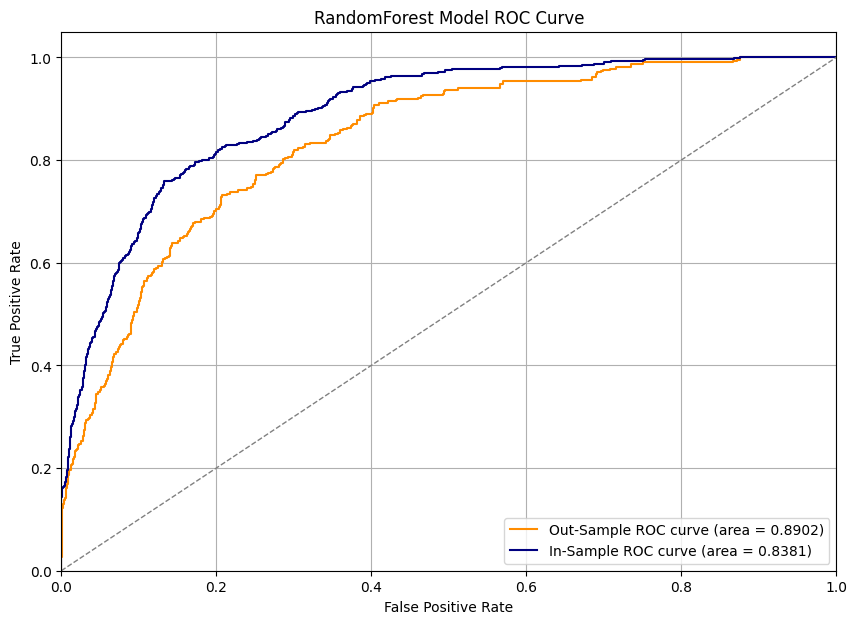

In [ ]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc="lower right")

plt.show()

💡The RandomForest model is performing well, with a good balance between in-sample and out-sample performance.
The slightly higher out-sample AUC could be due to randomness in data splits or an indication that the test set has more easily separable data.
Further evaluation (e.g., cross-validation, feature importance analysis) may be useful to confirm stability.